## 실습1 - 63p.

In [48]:
import pandas as pd

left = pd.DataFrame({
    'NAME' : ['Donna', 'Gracie', 'Luanne'],
    'GENDER' : ['여성', '여성', '여성'],
    'AGE' : [42, 38, 43],
    'AGEGROUP': ['40대', '30대', '40대'],
    'WEIGHT': [68.15, 81.87, 85.84]
})

right = pd.DataFrame({
    'NAME' : ['Donna', 'Gracie', 'Luanne'],
    'GENDER' : ['여성', '여성', '여성'],
    'AGE' : [42, 38, 43],
    'OXY' : [59.571, 60.055, 54.297],
    'RUNTIME' :[8.17, 8.63, 8.65],
    'RUNPULSE' : [166, 170, 156],
    'RSTPULSE' : [40, 48, 45],
    'MAXPULSE' : [172, 186, 168]
})

In [49]:
display(left)
display(right)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT
0,Donna,여성,42,40대,68.15
1,Gracie,여성,38,30대,81.87
2,Luanne,여성,43,40대,85.84


,NAME,GENDER,AGE,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,59.571,8.17,166,40,172
1,Gracie,여성,38,60.055,8.63,170,48,186
2,Luanne,여성,43,54.297,8.65,156,45,168


In [50]:
result = pd.merge(left, right, on=['NAME', 'GENDER', 'AGE'], how='outer')
result

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168


In [51]:
df = pd.read_csv('../실습파일/1 Big Data 분석 기초/FITNESS.csv', encoding= 'EUC-KR')
df.head(3)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168


## 실습2 - 72p.

In [52]:
result

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168


In [53]:
trans = df.groupby(['GENDER', 'AGEGROUP'], as_index=False)['WEIGHT'].mean()
trans

,GENDER,AGEGROUP,WEIGHT
0,남성,30대,81.080000
1,남성,40대,85.465000
2,남성,50대,79.426000
3,여성,30대,78.925000
4,여성,40대,72.943750
5,여성,50대,70.856667


In [54]:
trans.pivot(index='GENDER', columns='AGEGROUP', values='WEIGHT')

AGEGROUP,30대,40대,50대
GENDER,,,
남성,81.080,85.46500,79.426000
여성,78.925,72.94375,70.856667


In [55]:
# trans.melt(id_vars=['GENDER', 'AGEGROUP'])
trans.pivot(index='AGEGROUP', columns='GENDER', values='WEIGHT')

GENDER,남성,여성
AGEGROUP,,
30대,81.080,78.925000
40대,85.465,72.943750
50대,79.426,70.856667


## Python을 이용한 기술통계 실습 - 타이타닉
step 1. 데이터 속성 및 기술통계량 확인
step 2. 목표변수 및 설명변수의 분포 확인
step 3. 변수들의 결측 및 이상치 처리
step 4. 그래프 분석을 통해 변수 간 관계를 확인
step 5. 생존에 영향을 미치는 잠재 인자 도출


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [57]:
# 파일 불러오기
df_titanic = pd.read_csv('../실습파일/1 Big Data 분석 기초/titanic.csv')

In [58]:
# 데이터 속성 확인하기 
df_titanic.info()
print()
print(df_titanic.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

(891, 12)


In [59]:
# 기술 통계량 확인
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
# 결측치 확인하기 
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

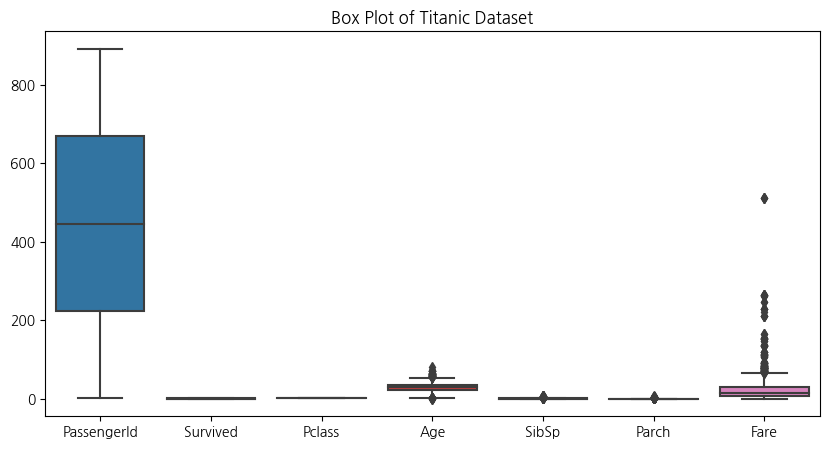

In [62]:
# 이상치 확인하기
plt.figure(figsize=(10,5))
plt.title('Box Plot of Titanic Dataset')
sns.boxplot(data=df_titanic)
plt.show()

In [63]:
# 결측치가 발생한 변수의 최빈값으로 대체
mode_values = df_titanic.mode().iloc[0]
df_filled = df_titanic.fillna(mode_values)
df_filled.info()
print(df_filled.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [64]:
# 파생변수 생성
df_filled['Cabin'] = df_filled['Cabin'].str.get(i=0)
df_filled['Age_Group'] = pd.cut(df_filled['Age'], bins=[0, 14, 28, 45, 56, float('inf')],
                                 labels=['Child', 'Young', 'Middle', 'Prime', 'Old'])
df_filled['Family'] = df_filled['Parch'] + df_filled['SibSp']
df_filled['Family_Group'] = pd.cut(df_filled['Family'], bins=[0, 1,  4, float('inf')],
                                 labels=['Alone', 'Small', 'Big'])
df_filled['Fare_Group'] = pd.cut(df_filled['Fare'], bins=[0, 50, 100, 150, 200, float('inf')],
                                 labels=['0', '1', '2', '3', '4'])

def check_advantage(age_group):
    if age_group in ['Child', 'Old']:
        return '사회적 약자'  # 사회적 약자
    elif age_group in ['Young', 'Middle', 'Prime']:
        return '일반인'  # 일반인

df_filled['Advantage'] = df_filled['Age_Group'].apply(check_advantage)

In [65]:
df_filled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Family_Group,Fare_Group,Advantage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B,S,Young,1,Alone,0,일반인
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,1,Alone,1,일반인
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B,S,Young,0,NaN,0,일반인
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,1,Alone,1,일반인
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B,S,Middle,0,NaN,0,일반인


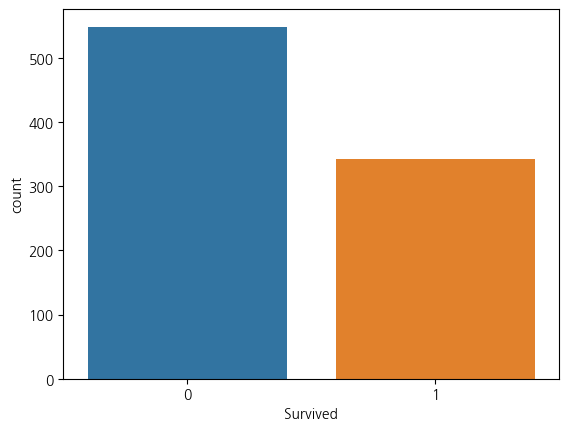

In [66]:
# sns.histplot(data=df_filled, x='Survived')
survived_counts = df_filled['Survived'].value_counts()
sns.countplot(x="Survived", data=df_filled)
plt.show()


# 성별과 탑승 여부
##### 성별과 탑승 여부를 관련 짓는다면 남자들의 타이타닉호 탑승 인원이 여자들의 타이타닉호 탑승 인원보다 1.6배 가량 많다는 것을 알 수 있다.
##### 이로부터 20세기 초에 유일한 해상 이통수단인 배를 타기 위해서는 사회생활을 더 자주 해야 하는 남자들이 많이 탑승했을 수 밖에 없다는 것을 확인할 수 있다. 여자자자들은 주로 가정과 가족에 머무르는 경향이 있었기 때문에, 배를 타는 경우가 상대적으로 적었을 것으로 생각된다.

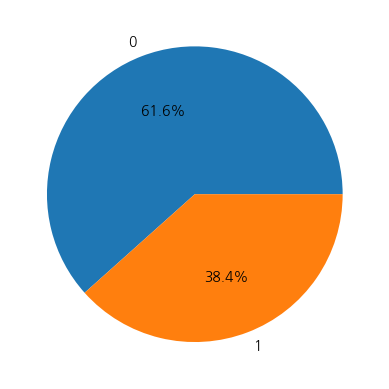

In [67]:
df_count = df_filled.groupby(['Survived']).size()
df_count.plot.pie(y = 'counts', autopct="%.1f%%")
plt.show()

In [68]:
df_filled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Family_Group,Fare_Group,Advantage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B,S,Young,1,Alone,0,일반인
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,1,Alone,1,일반인
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B,S,Young,0,NaN,0,일반인
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,1,Alone,1,일반인
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B,S,Middle,0,NaN,0,일반인


# 성별과 사망자 수
#### 남성과 여자의 사망자 수를 비교해보면 여자의 생존자 수가 사망자 수에 비해 3배 가량 높은 걸 확인할 수 있다.
#### 이에 반해 남자는 사망자 수가 생존자 수 보다 4배 가량 높은 걸 확인할 수 있다.
#### 이러한 사실로부터 여자가 남자 보다 우대를 받고 타이타닉 호로부터 구조를 받는 데에 특혜가 있었던 것으로 볼 수 있다.
#### 또한 남자들의 경우 미국으로의 이민을 고대하거나 일자리를 구하려고 하는 저소득 계층이 다수 포함되어 있을 것으로 볼 수 있어 사회적 계층으로 인해 차별을 당했을 것으로 판단한다. 이에 반해 여자들의 경우 사회적 활동이 제한된 만큼 남편을 따라 배에 승선했을 것이다.
#### 남편이 아내의 품삯을 지불해도 괜찮을 정도라면 부유한 계층에 속할 것으로 판단하고 이에 따라 아내 또한 특혜를 받았을 것으로 생각된다.

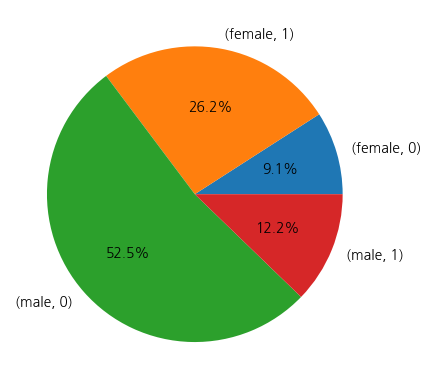

In [69]:
df_count = df_filled.groupby(["Sex", "Survived"]).size()
df_count.plot.pie(y = "count", autopct="%.1f%%")
plt.show()

# 사회적 약자와 사망자 수
##### 생존자들 중에 사회적 약자인 노약자와 어린이들 중에는 사망자와 생존자 수가 비슷한 분포로 구성되어 있는 걸 확인할 수 있다.
##### 이에 반해 일반인인 청년, 중장년층의 비율은 사망자가 생존자에 비해 높다. 이로부터 일반인들이 사회적 약자를 배려하여 사회적 약자를 구출하는 데에 큰 반발을 하지 않았던 것으로 파악된다.

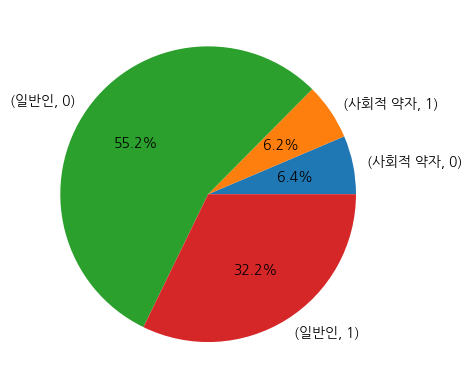

In [70]:
df_count = df_filled.groupby(["Advantage", "Survived"]).size()
df_count.plot.pie(y = "count", autopct="%.1f%%")
plt.show()

# 객실 클래스와 사망자 수
#### 객실 클래스와 사망자 수를 대조하여 분석해보면 3등급 객실은 사망자 수가 생존자 수 대비 2배 이상의 결과가 나오는 걸 확인할 수 있다. 이에 반해 2등급 객실은 사망자 수와 생존자 수가 비슷하며 1등급 객실은 생존자 수가 사망자 수 보다 비율이 높다.
#### 이러한 사실로부터 자본주의가 생겨나기 시작할 무렵인 타이타닉호 사건 때에 자본이 많은 부자들 위주로 먼저 탈출을 시켜주는 데에 도움을 줬을 것이라 생각된다.

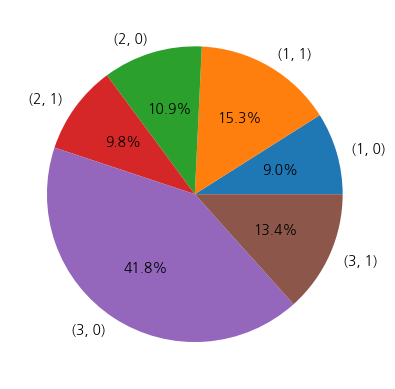

In [71]:
df_count = df_filled.groupby(["Pclass", "Survived"]).size()
df_count.plot.pie(y = "count", autopct="%.1f%%")
plt.show()

# 가족 동참 여부와 사망자 수
#### 혼자인 경우와 4명 이하의 소가족, 그 이상의 대가족으로 분리하였다. 혼자인 경우와 소가족의 생존 비율은 비슷했으나 대가족의 비율에서는 사망자의 비율이 생존자의 비율 보다 훨씬 높다는 걸 확인할 수 있다. 이는 대가족을 모두 구출시키는 데에는 많은 기회비용이 필요하므로 이를 지원해주기 힘들었기 때문일 것으로 생각된다. 더불어 대가족의 경우 한 명이라도 살지 못하게 된다면 다같이 죽는 게 나을 것이라 생각해 이러한 결정을 내렸을 가능성도 있을 것 같다.

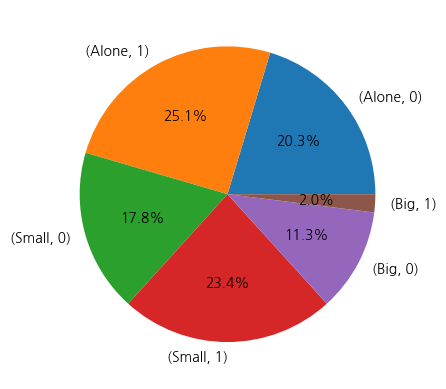

In [72]:
df_count = df_filled.groupby(["Family_Group", "Survived"]).size()
df_count.plot.pie(y = "count", autopct="%.1f%%")
plt.show()

# 탑승한 곳과 생존 여부
#### Embarked에서의 'C'는 Cherbourg, 'Q'는 Queenstown, 'S'는 Southampton으로 Cherbourg의 경우에만 생존자 수 비율이 사망자 수 비율 보다 높고 Queenstown, Southampton의 경우 생존자 수 비율이 사망자 수 비율 보다 높은 걸 알 수 있다.
#### 이로부터 도시 간의 빈부를 예측해볼 수 있는데 Cherbourg는 비교적 부촌이고 Queenstown이 그 다음 Southampton이 그 다음 순서이다. Southampthon이 생존자 수 보다 훨씬 사망자 수가 많다는 사실을 봤을 때 Southampthon 출신이 가난하여 구원을 받는 데에 차별을 많이 당했다는 것을 알 수 있다.

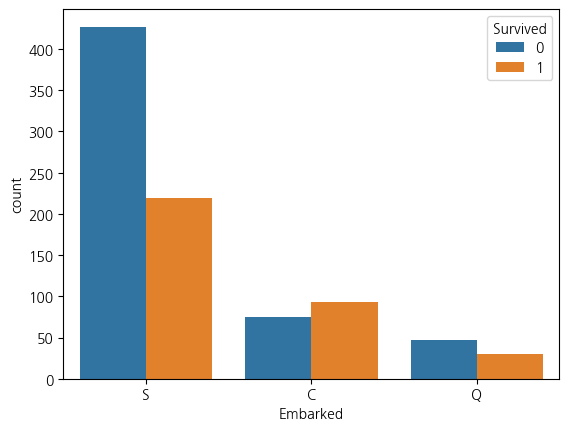

In [73]:
survived_counts = df_filled.groupby('Embarked')['Survived'].value_counts()
sns.countplot(x="Embarked", hue="Survived", data=df_filled)
plt.show()

# 티켓 요금과 생존 여부
#### 승객의 티켓 요금과 생존 여부를 비교한다. 가장 싼 티켓을 제외하고는 생존자 수가 사망자 수 보다 높았다. 가장 싼 티켓의 경우 사망자 수가 생존자 수에 대비해 2배 가량 높았다. 가장 싼 티켓을 구매한 승객들이 차별을 많이 당해 구출을 받기 쉽지 않았을 것으로 판단된다. 생존자 수가 사망자 보다 가장 많은 차이를 보이며 많았던 경우는 '2' 그룹이었는데 이 그룹부터는 탈출을 더 편리하게 구원받았을 것으로 생각된다.

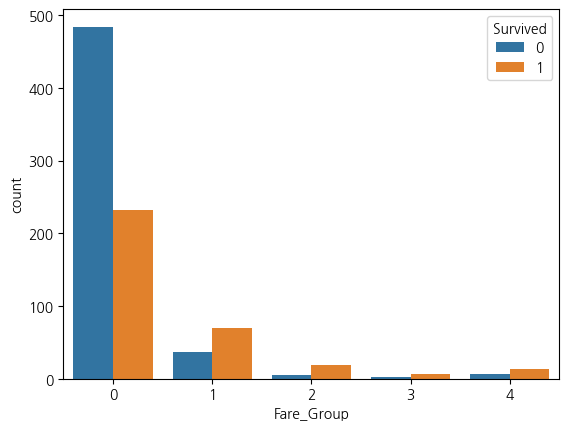

In [74]:
survived_counts = df_filled.groupby('Fare_Group')['Survived'].value_counts()
sns.countplot(x="Fare_Group", hue="Survived", data=df_filled)
plt.show()

## 성별과 나이 그룹을 통한 생존 여부 확인
#### 성별을 비교했을 때 이전에서 분석한 것과 같이 여성의 생존율이 남성의 생존율 보다 훨씬 높은 것을 볼 수 있다. 여성의 경우 나이가 많아질 수록 오히려 생존 확률이 높아지는 걸 볼 수 있지만 남성의 경우 어린이를 제외하고는 생존률이 큰 차이가 없는 것을 확인할 수 있다.
#### 이전에서 분석한 대로 여성을 배려해주는 문화의 영향이 컸었던 것으로 생각되는데 탑승객의 대다수가 영국인과 미국인이므로 영국의 신사 문화가 반영된 것으로 볼 수 있다.

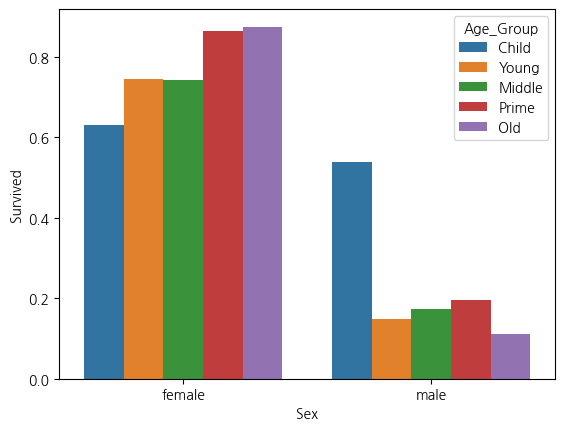

In [75]:
# 성별과 나이 그룹을 기준으로 생존 여부의 평균 계산
survival_rate = df_filled.groupby(['Sex', 'Age_Group'])['Survived'].mean().reset_index()

# barplot 생성
sns.barplot(x='Sex', y='Survived', hue='Age_Group', data=survival_rate)
plt.show()

## 총정리
타이타닉은 역사상 가장 유명한 해상 재앙 중 하나로, 1912년 4월 15일에 북대서양을 가로질러 세계 여행을 하던 중 빙산과 충돌하여 침몰했다다.

이 사건의 사망자 수를 비교해보며 크게 3가지 키워드를 추릴 수 있었다.

여성을 배려하는 문화 측면에서, 타이타닉 침몰 당시 여성과 어린이를 먼저 구조하는 "여성과 아이 우선"의 원칙이 강조되었다. 이는 당시의 사회적 가치와 동시에 여성의 생존 우선권을 강조하는 문화적인 가치를 반영하였고 이러한 결과는 데이터 분석 표에도 잘 드러난다.

또한, 사회적 약자를 배려하는 문화가 나타났는데 침몰 후 구조 작업에서 노약자, 어린이 등의 사회적 약자가 보호받는 현상이 드러났다. 이는 사회적 불평등을 인식하고, 그에 따른 행동을 취하는 중요성을 강조하는 좋은 사례가 되었다.

마지막으로, 타이타닉의 침몰은 자본주의의 한 측면을 나타내기도 했다. 이 배는 당시에 거대한 재산과 부의 상징이었다. 그러나 이러한 자본주의의 특성은 생존 가능성과도 연결되었는데 티켓의 등급에 따라 생존률의 차이가 극심한 것은 자본주의 사회로 인해 불평등이 일어났던 것으로 파악된다. 더 나아가 자본주의와 도시를 연결지어 도시 별 생존률을 확인함으로써 도시 간 빈부격차 또한 파악할 수 있었다.

